# Grid Cell Phase Coding 

The second cell will load the trial data. There are some parameters that can be changed - which **dataset** (1-8) and analysis **type** (spatial/temporal). 

Once the "trial" is initialized, "phase_analysis()" can be run on it to return the correlation value. There are then a number of graph functions that can be run: XY_plot(), phase_plot(), phase_map_plot(), trajectory_plot(), prediction_plot() and corr_plot(). 

Once the parameters in the second cell are set, the whole notebook can be ran via "Cell" -> "Run All"

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#Some display options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bulk_analysis
import pycircstat
import os
import glob
import numpy as np
import astropy
import scipy.stats

dir = 'JH/'

def rmse(pred, targets):
    return np.sqrt(np.mean((pred-targets)**2))

In [ ]:
t_angles = []
rls = []
rcs = []

for trial in sorted(os.listdir(dir)):
    #for channel in range(1,6):
        
        #print(trial, channel)
        #print(trial)
        
        file_names = sorted(glob.glob(dir+trial+'/CH'+'*spikeData.csv'))
        file_arr = [np.loadtxt(f, delimiter='\t') for f in file_names]
        file_arrs = [i for i in file_arr if i.size>7]
        allspikes = np.concatenate(file_arrs)
        
        print(allspikes.shape)
        
        if allspikes.shape[0]>1250:
            run = bulk_analysis.gridCells(allspikes, 'temporal', control=False)
            run.phase_analysis()
            t_angles.append(run.angles)
            rls.append(run.rl)
            rcs.append(run.rc)
    

In [13]:
f_angles = []
frls = []
frcs = []

for trial in sorted(os.listdir(dir)):
    for channel in range(1,6):
        
        #print(trial)
        
        file_names = sorted(glob.glob(dir+trial+'/CH'+str(channel)+'*spikeData.csv'))
        file_arr = [np.loadtxt(f, delimiter='\t') for f in file_names]
        file_arrs = [i for i in file_arr if i.size>7]
        allspikes = np.concatenate(file_arrs)
        
        #print(allspikes.shape)
        
        if allspikes.shape[0]>1250:

            run = bulk_analysis.gridCells(allspikes, 'temporal', control=True)
            run.phase_analysis()
            f_angles.append(run.angles)
            frls.append(run.rl)
            frcs.append(run.rc)


In [ ]:
def bulky(dir, size):
    
    t_angles = []
    f_angles = []

    for trial in sorted(os.listdir(dir)):

            file_names = sorted(glob.glob(dir+trial+'/CH'+'*spikeData.csv'))
            file_arr = [np.loadtxt(f, delimiter='\t') for f in file_names]
            file_arrs = [i for i in file_arr if i.size>7]
            allspikes = np.concatenate(file_arrs)

            print(trial, allspikes.shape)

            if allspikes.shape[0]>size:

                run = bulk_analysis.gridCells(allspikes, 'temporal', control=False)
                run.phase_analysis()
                tangles = run.angles

                run2 = bulk_analysis.gridCells(allspikes, 'temporal', control=True)
                run2.phase_analysis()
                fangles = run2.angles

                t_angles.append(tangles)
                f_angles.append(fangles)  
    
    tangles = np.asarray([item for sublist in t_angles for item in sublist])
    fangles = np.asarray([item for sublist in f_angles for item in sublist])
    
    tdiff = np.radians(tangles[:,0]-tangles[:,1])
    fdiff = np.radians(fangles[:,0]-fangles[:,1])
    
    k2 = str(astropy.stats.kuiper_two(tdiff,fdiff)[1])
    
    return(tangles, fangles, k2)

tangles, fangles, k2 = bulky(dir, 500)
print(k2)

In [42]:
t_angles = []
f_angles = []

for trial in sorted(os.listdir(dir)):
    for channel in range(1,6):
        
        #print(trial)
        
        file_names = sorted(glob.glob(dir+trial+'/CH'+str(channel)+'*spikeData.csv'))
        file_arr = [np.loadtxt(f, delimiter='\t') for f in file_names]
        file_arrs = [i for i in file_arr if i.size>7]
        allspikes = np.concatenate(file_arrs)

            #print(allspikes.shape)
        if allspikes.shape[0]>100:

            run = bulk_analysis.gridCells(allspikes, control=False)
            run.phase_analysis()
            tangles = run.angles
            
            corrs = []
            for i in range(5):
                run2 = bulk_analysis.gridCells(allspikes, control=True)
                run2.phase_analysis()
                fangles = run2.angles
                corrs.append(run2.rl)
            
            if run.rl>np.mean(corrs):
                print(run.rl, np.mean(corrs))
                t_angles.append(tangles)
                f_angles.append(fangles)  



0.5042826313255806 0.4807639970546581
0.5272106337563254 0.5009515028827058
0.45001619526905096 0.442807151147815
0.5232033731041202 0.4895449180460588
0.5326769957696307 0.5254371598919404
0.5439004749719748 0.5133134743093899
0.47766317932099706 0.47574055107292584
0.6150778539846765 0.5923434278984857
0.5624042718723488 0.4934474692550732
0.473021126465739 0.4431076010664915
0.5206271407441226 0.49438325989550097
0.5904135825006164 0.5842268533343609
0.6977688916040616 0.5987204943473305
0.6336258868421631 0.5956625996670636
0.391144870416873 0.380442908115008
0.2721800190704893 0.25878282808166375
0.24000363564598318 0.20531929582205696
0.57185357536946 0.5712631764815262
0.6503323877674068 0.6058911990224044
0.5642040495638239 0.5493611450610911
0.6561445582500356 0.6413338082757509
0.47608856735386507 0.46396514662753247
0.5971339164173489 0.5642901592148506
0.5166142593686773 0.4926720348056356
0.5183665340707476 0.49068203534927646
0.38398152792985824 0.3290807652686592
0.38188

In [43]:
print(len(t_angles))

68


In [44]:
tangles = np.asarray([item for sublist in t_angles for item in sublist])
fangles = np.asarray([item for sublist in f_angles for item in sublist])

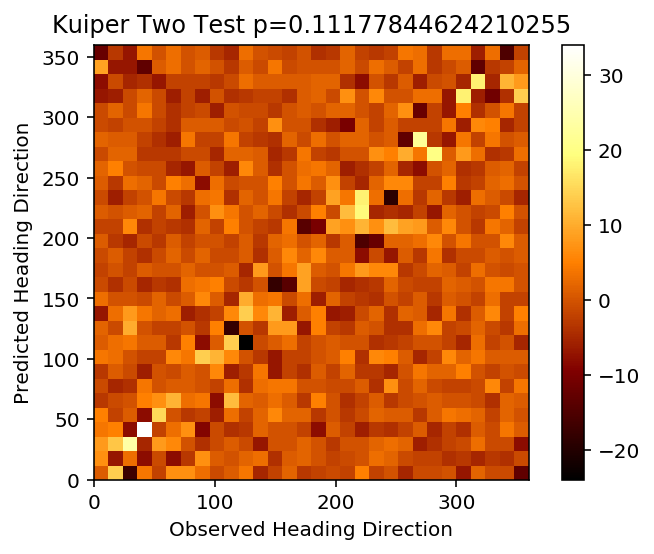

In [45]:
tdiff = np.radians(tangles[:,0]-tangles[:,1])
fdiff = np.radians(fangles[:,0]-fangles[:,1])
k2 = str(astropy.stats.kuiper_two(tdiff,fdiff)[1])

heatmap, xedges, yedges = np.histogram2d(tangles[:, 0], tangles[:, 1], bins=30)
heatmap2, xedges, yedges = np.histogram2d(fangles[:, 0], fangles[:, 1], bins=30)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
diff = heatmap - heatmap2

plt.clf()
plt.imshow(diff.T, extent=extent, origin='lower', cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.title('Kuiper Two Test p='+k2)
plt.show()

In [40]:
s_tdiff = sorted(tdiff)
s_fdiff = sorted(fdiff)

plt.hist(s_tdiff[len(s_tdiff)/6:len(s_tdiff)*(5/6)], bins=500);
plt.hist(s_fdiff[len(s_fdiff)/6:len(s_fdiff)*(5/6)], bins=500, color='r');

TypeError: slice indices must be integers or None or have an __index__ method

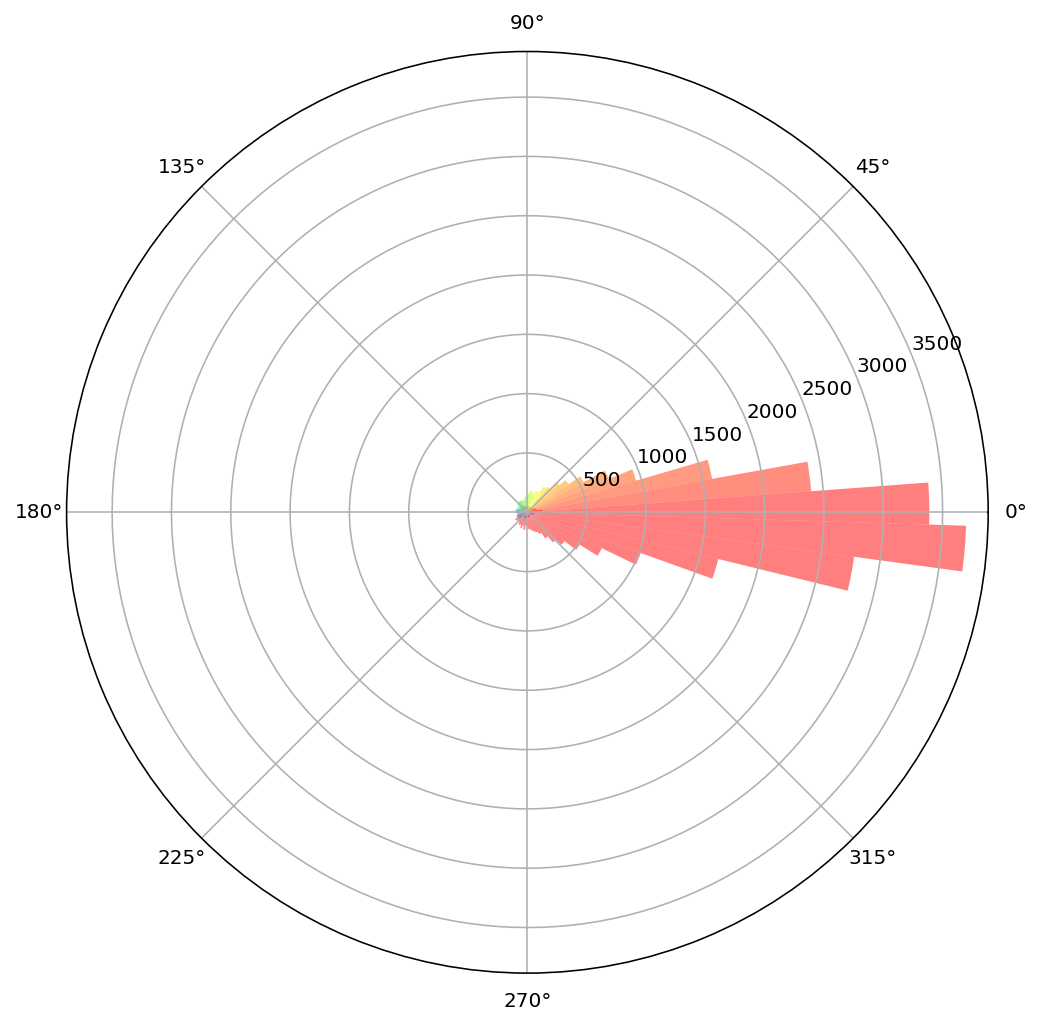

In [13]:
diff = np.sort(tangles[:,0]-tangles[:,1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
theta = np.radians(np.arange(diff.min(),diff.max()+6,6))

inds = [np.where(diff<i)[0][-1] for i in np.arange(diff.min()+6,diff.max()+6,6)] #vectorize operation?
b = np.split(diff,inds)
radii = np.array([i.size for i in b])

width = np.radians(360/60)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for theta, bar in zip(theta, bars):
    bar.set_facecolor(plt.cm.hsv(theta/6.28))
    bar.set_alpha(0.5)

plt.show()

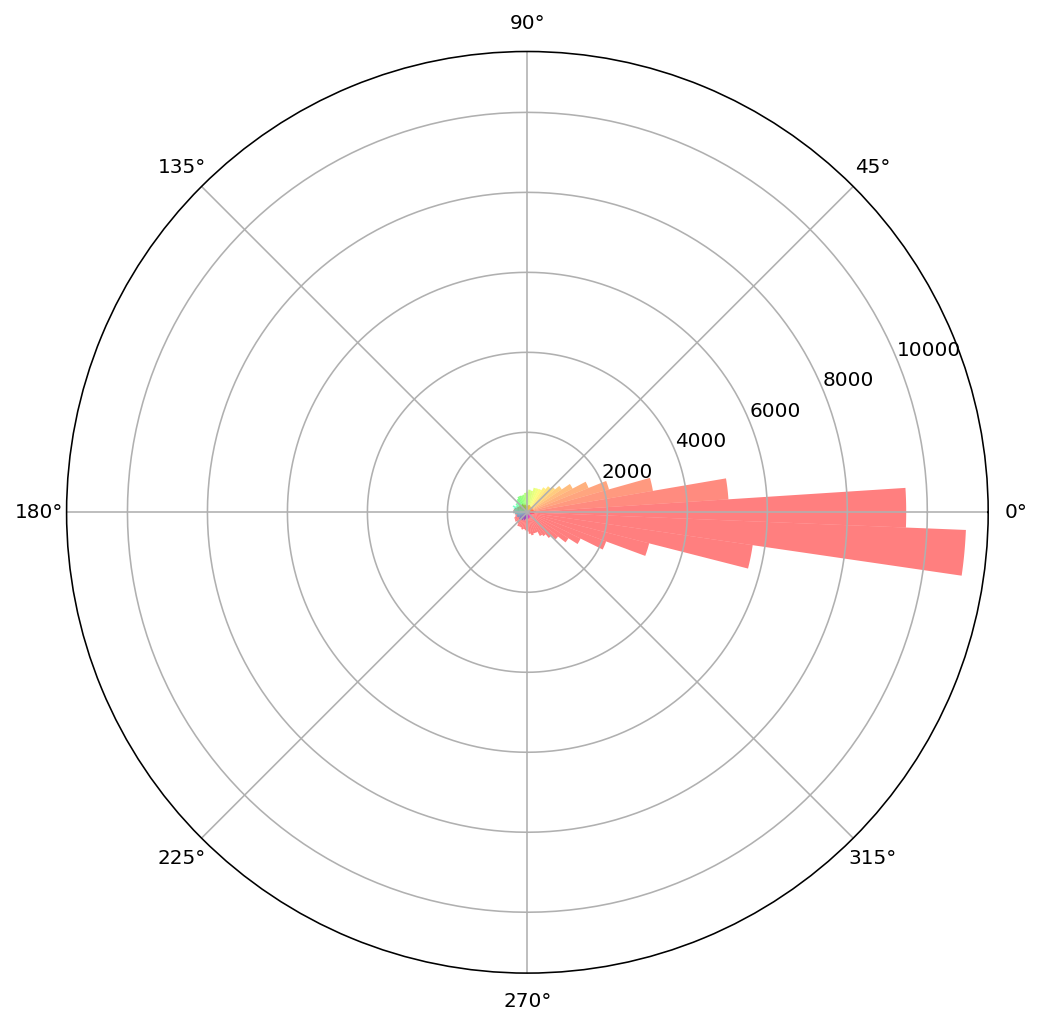

In [25]:
diff = np.sort(fangles[:,0]-fangles[:,1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
theta = np.radians(np.arange(diff.min(),diff.max()+6,6))

inds = [np.where(diff<i)[0][-1] for i in np.arange(diff.min()+6,diff.max()+6,6)] #vectorize operation?
b = np.split(diff,inds)
radii = np.array([i.size for i in b])

width = np.radians(360/60)
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for theta, bar in zip(theta, bars):
    bar.set_facecolor(plt.cm.hsv(theta/6.28))
    bar.set_alpha(0.5)

plt.show()